In [56]:
import numpy as np # linear algebra
import pandas as pd # data processing

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

import seaborn as sns
import matplotlib.pyplot as plt

In [57]:
df = pd.read_excel('glass.xlsx',sheet_name ='glass')
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [59]:
print(df['Type'].unique())

[1 2 3 5 6 7]


In [60]:
df['Type'].value_counts()

Type
2    76
1    70
7    29
3    17
5    13
6     9
Name: count, dtype: int64

In [61]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [62]:
df.isnull().values.any()

np.False_

In [63]:
df['Type'].value_counts()

Type
2    76
1    70
7    29
3    17
5    13
6     9
Name: count, dtype: int64

In [64]:
df_value_counts = df['Type'].value_counts() # sets up a value counts data frame
df_value_counts

Type
2    76
1    70
7    29
3    17
5    13
6     9
Name: count, dtype: int64

In [65]:
df_elements = df.drop('RI', axis = 'columns')

In [66]:
loop_list = [1,2,3,5,6,7] 

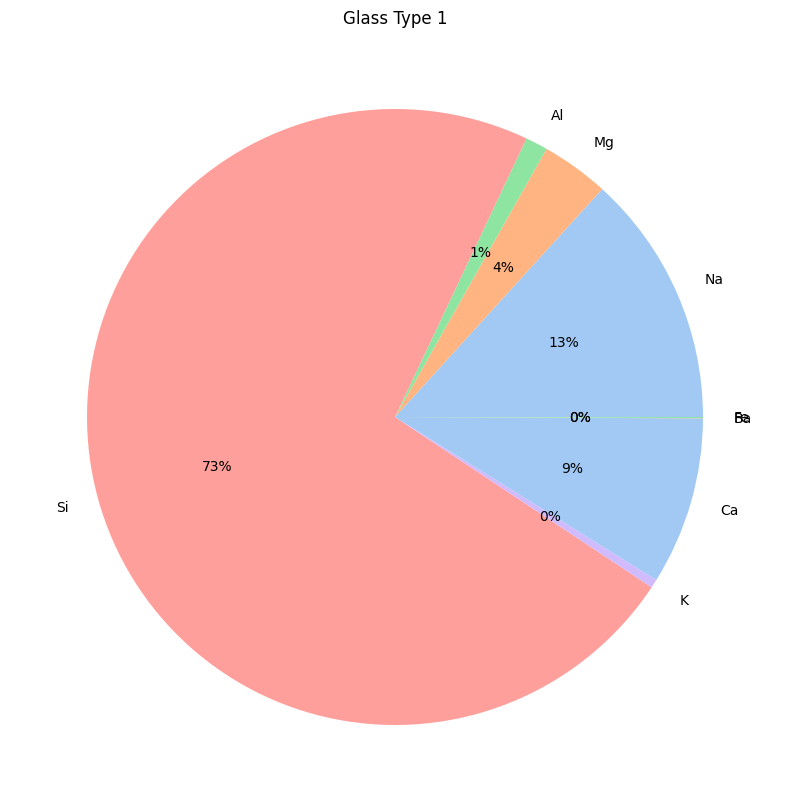

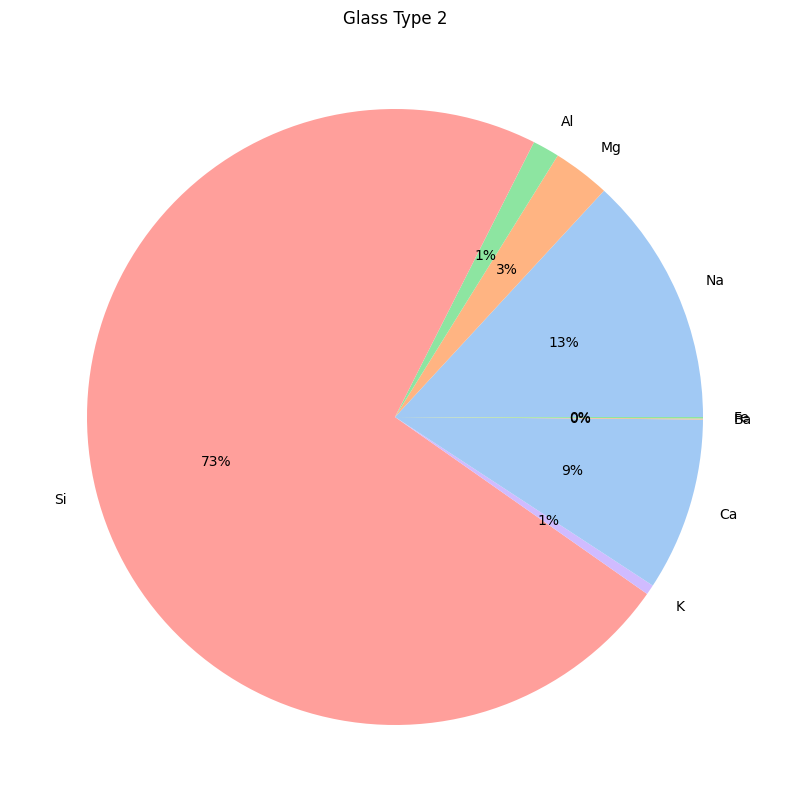

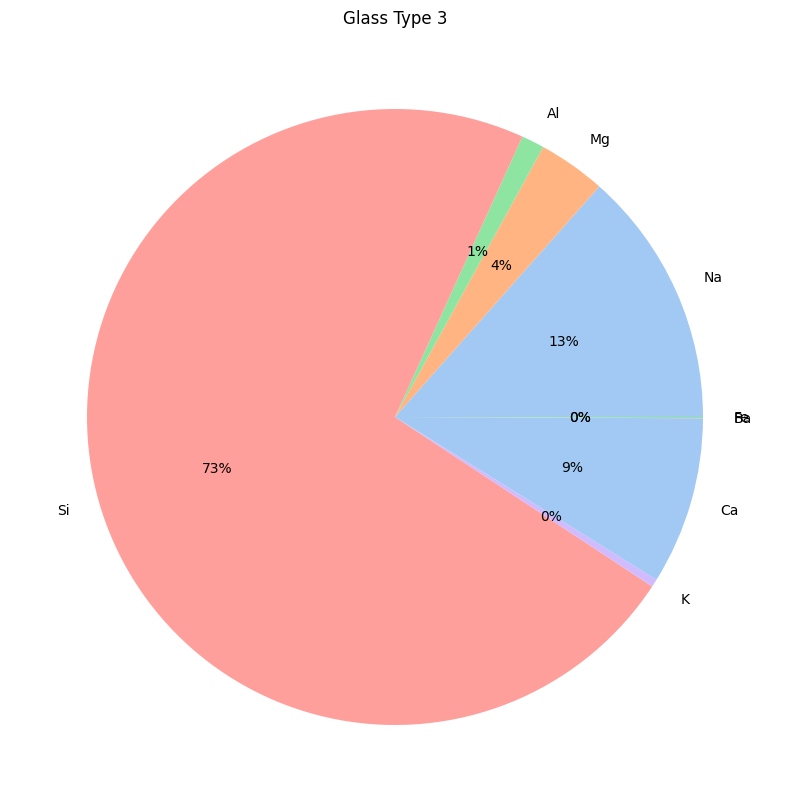

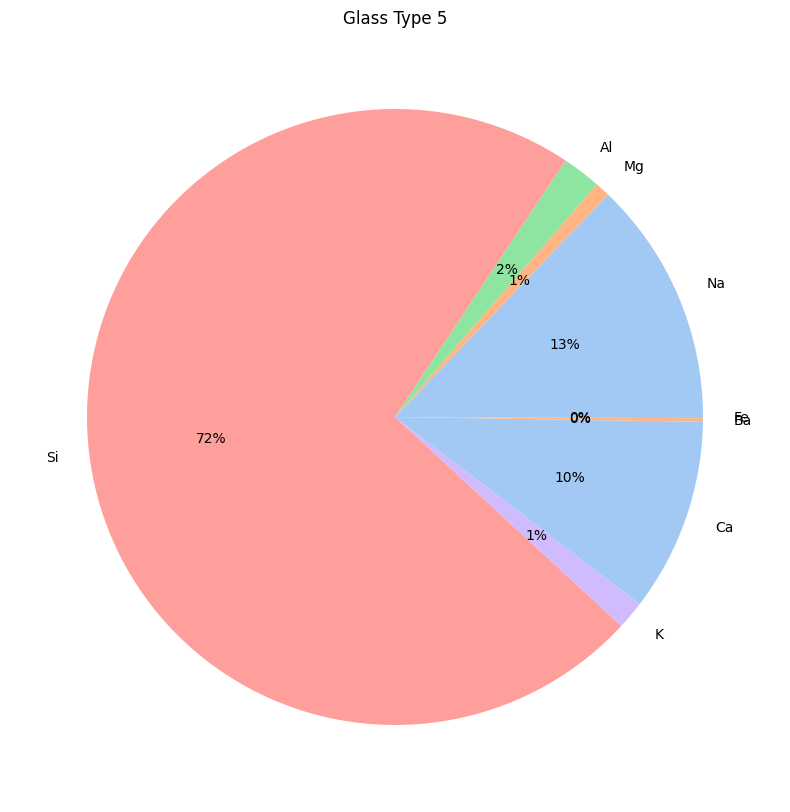

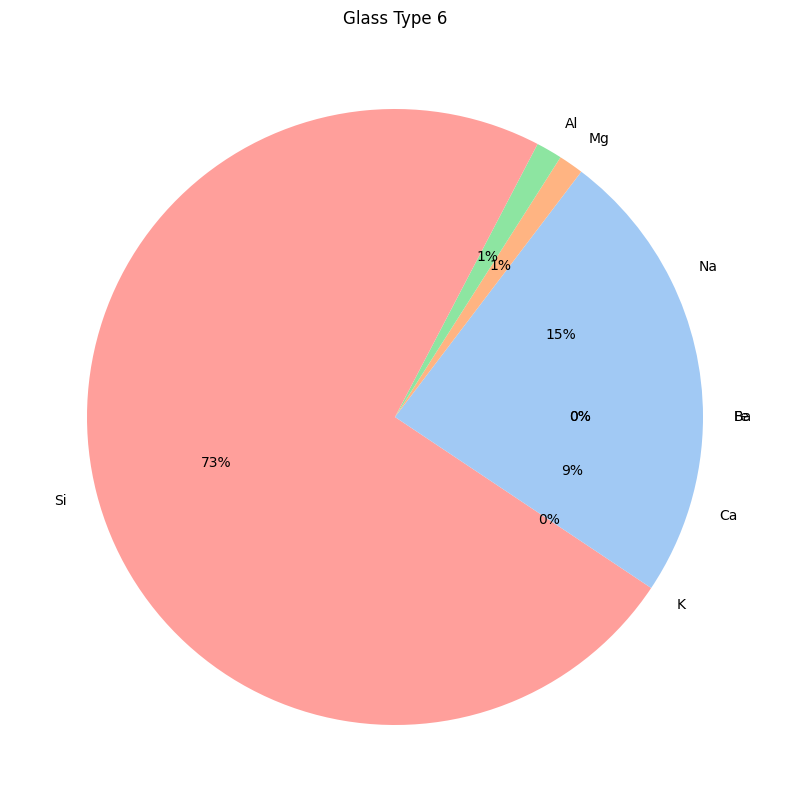

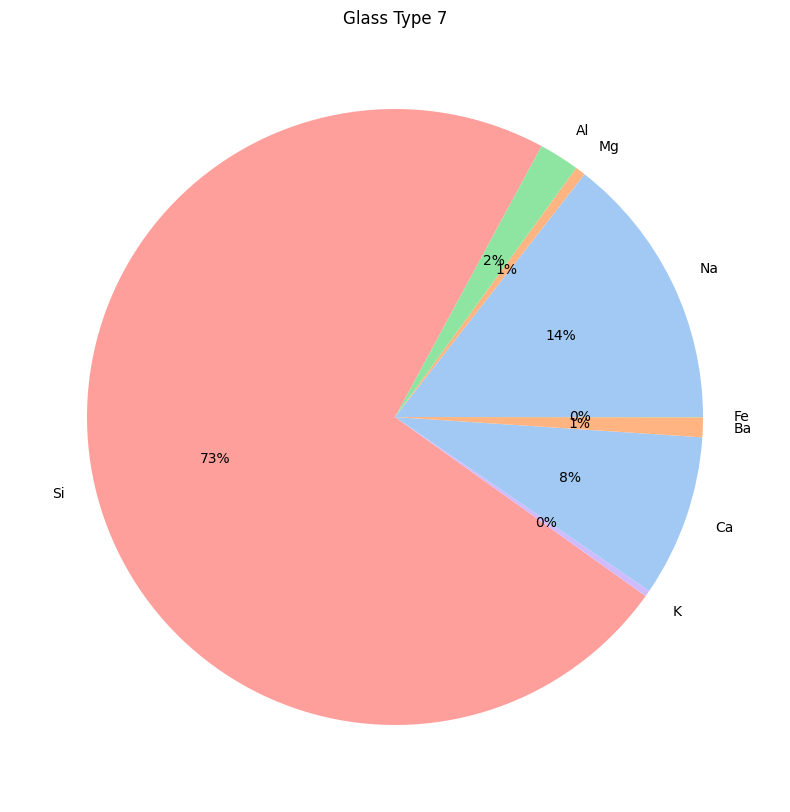

In [67]:
for x in loop_list:
    df_type_1 = df_elements[df_elements["Type"] == x] # sets up a data frame with all rows with type 1
    df_type_1 = df_type_1.drop('Type', axis = 'columns') # dropping unnessary columns
    
    df_type_1_average = df_type_1.sum()/len(df_type_1.index)  # Get averages of each element for the specific glass type
    df_type_1_average = df_type_1_average.to_frame()
    elements = ['Na', 'Mg', 'Al', 'Si', 'K', 'Ca','Ba','Fe'] # Assing an elements column to the data frame
    df_type_1_average = df_type_1_average.assign(Elements=elements)
    
    df_type_1_average.columns =['Amount','Elements'] # Name the columns
    
    df_type_1_average_p = df_type_1_average.sum() # get the sum of all element amounts
    df_type_1_p = df_type_1_average['Amount']/df_type_1_average_p['Amount'] # get the actual percentage of each element amount

    
    #define data
    data = df_type_1_p
    labels = df_type_1_average['Elements']
    #define Seaborn color palette to use
    colors = sns.color_palette('pastel')[0:5]

    #adjust size
    fig, ax = plt.subplots(figsize=(10, 10))

    #create pie chart
    plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
    
    # Add title to the chart
    plt.title(f'Glass Type {x}')

    plt.show()

(1.515, 1.525)

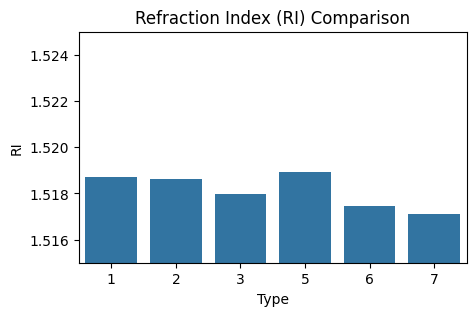

In [68]:
# Size
plt.figure(figsize=(5,3))
# Title
plt.title("Refraction Index (RI) Comparison")
# Bar chart
sns.barplot(x=df['Type'], y=df['RI'], errorbar=None)
# Vertical axis label
plt.ylabel("RI")
# Sets the y-axis limits to make the data comparison easier
plt.ylim(1.515, 1.525)

Text(0, 0.5, 'Fe')

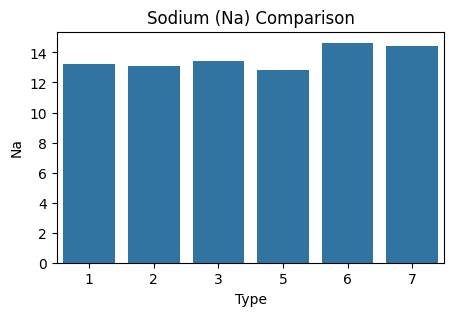

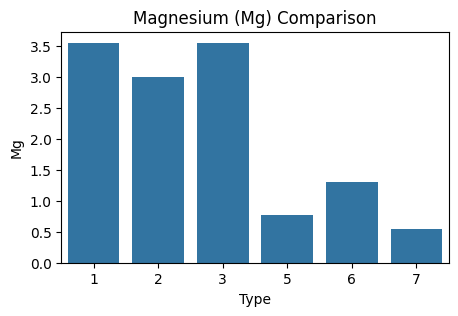

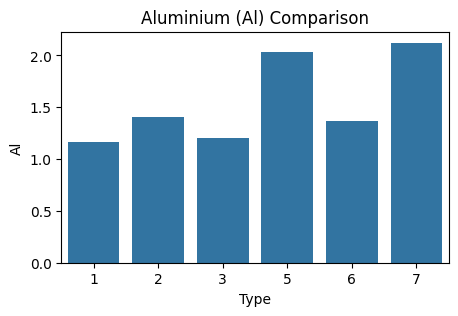

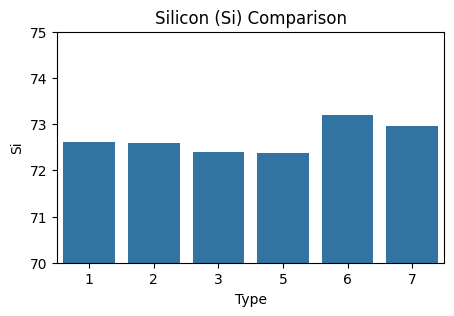

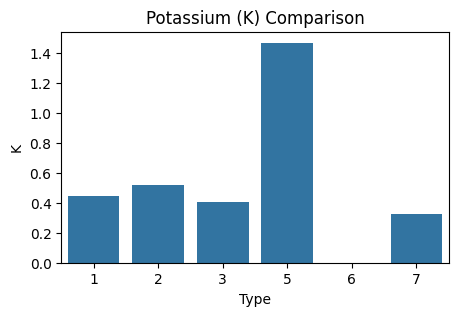

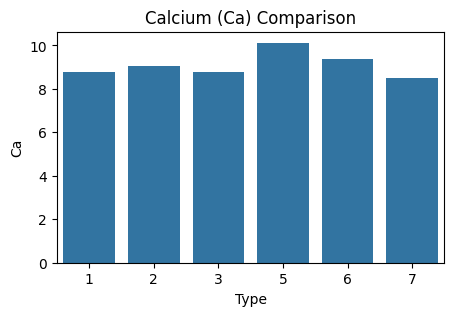

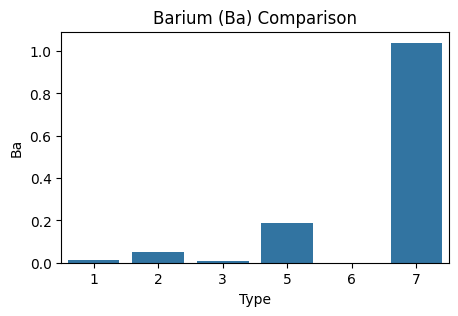

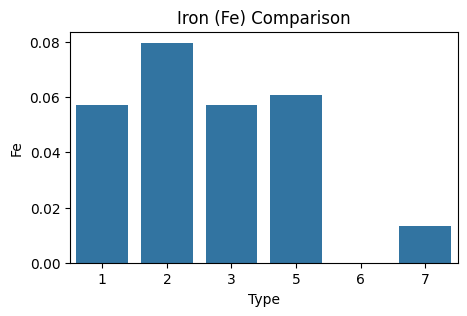

In [69]:
# Size
plt.figure(figsize=(5,3))
# Title
plt.title("Sodium (Na) Comparison")
# Bar chart
sns.barplot(x=df['Type'], y=df['Na'], errorbar=None)
# Vertical axis label
plt.ylabel("Na")

# Size
plt.figure(figsize=(5,3))
# Title
plt.title("Magnesium (Mg) Comparison")
# Bar chart
sns.barplot(x=df['Type'], y=df['Mg'], errorbar=None)
# Vertical axis label
plt.ylabel("Mg")

# Size
plt.figure(figsize=(5,3))
# Title
plt.title("Aluminium (Al) Comparison")
# Bar chart
sns.barplot(x=df['Type'], y=df['Al'], errorbar=None)
# Vertical axis label
plt.ylabel("Al")

# Size
plt.figure(figsize=(5,3))
# Title
plt.title("Silicon (Si) Comparison")
# Bar chart
sns.barplot(x=df['Type'], y=df['Si'], errorbar=None)
# Vertical axis label
plt.ylabel("Si")
# Sets the y-axis limits to make the data comparison easier
plt.ylim(70, 75)

# Size
plt.figure(figsize=(5,3))
# Title
plt.title("Potassium (K) Comparison")
# Bar chart
sns.barplot(x=df['Type'], y=df['K'], errorbar=None)
# Vertical axis label
plt.ylabel("K")

# Size
plt.figure(figsize=(5,3))
# Title
plt.title("Calcium (Ca) Comparison")
# Bar chart
sns.barplot(x=df['Type'], y=df['Ca'], errorbar=None)
# Vertical axis label
plt.ylabel("Ca")

# Size
plt.figure(figsize=(5,3))
# Title
plt.title("Barium (Ba) Comparison")
# Bar chart
sns.barplot(x=df['Type'], y=df['Ba'], errorbar=None)
# Vertical axis label
plt.ylabel("Ba")

# Size
plt.figure(figsize=(5,3))
# Title
plt.title("Iron (Fe) Comparison")
# Bar chart
sns.barplot(x=df['Type'], y=df['Fe'], errorbar=None)
# Vertical axis label
plt.ylabel("Fe")

Setting up the Input and the Target Data

In [70]:
X = df.drop('Type', axis = 'columns') # drop unnessecary colums
y = df.Type

In [71]:
X

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [72]:
y

0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type, Length: 214, dtype: int64

In [73]:
# Splitting Training Data and Validation Data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2 )

In [74]:
# Training the Random Forest Classification Model
model = RandomForestClassifier( n_estimators = 40 ) # n_estimators is the amount of Decision Trees in the Random Forest

In [75]:
# Fit the model to the data
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=40)

Print a Confusion Matrix to evaluate the mode

In [76]:
y_predicted = model.predict(X_test)
y_predicted

array([2, 2, 2, 2, 1, 6, 1, 6, 7, 7, 1, 1, 2, 1, 5, 1, 1, 2, 2, 7, 2, 2,
       2, 2, 1, 2, 2, 1, 1, 1, 2, 7, 1, 5, 2, 7, 7, 6, 3, 1, 1, 1, 2])

In [77]:
cm = confusion_matrix(y_test, y_predicted)

Text(95.72222222222221, 0.5, 'y_test (Truth)')

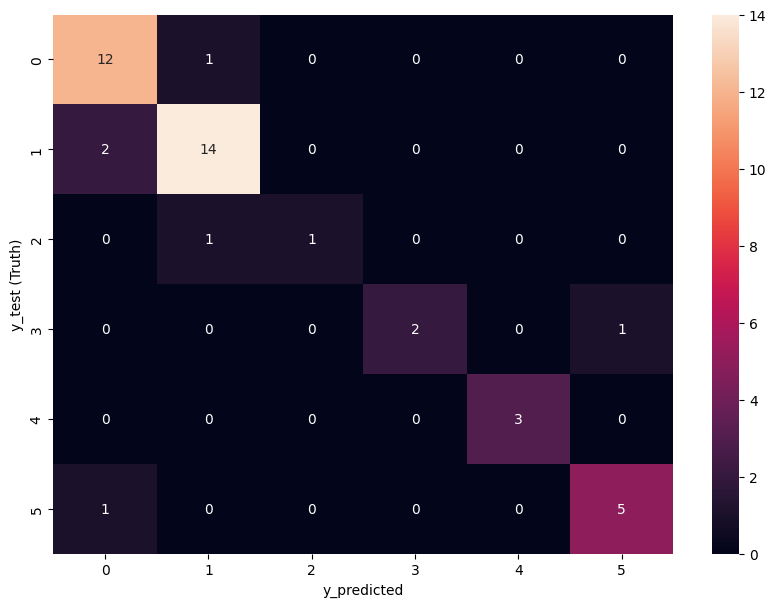

In [78]:
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.xlabel('y_predicted')
plt.ylabel('y_test (Truth)')

In [79]:
# Model Score
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predicted, normalize=True, sample_weight=None) 
# model.score(X_test,y_test) does the same. No imports needed

0.8604651162790697

In [80]:
model_e = RandomForestClassifier( n_estimators = 5 ) # The lower the less decision trees are built
model_e.fit(X_train,y_train)
model_e.score(X_test,y_test)

0.8604651162790697

In [81]:
model_e = RandomForestClassifier( n_estimators = 48 ) # The higher the more decision trees are built.
model_e.fit(X_train,y_train)
model_e.score(X_test,y_test)


0.8837209302325582

In [83]:
from sklearn.metrics import classification_report, accuracy_score


print("Classification Report:\n", classification_report(y_test, y_predicted))

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_predicted)
print("Accuracy: ", accuracy)

Classification Report:
               precision    recall  f1-score   support

           1       0.80      0.92      0.86        13
           2       0.88      0.88      0.88        16
           3       1.00      0.50      0.67         2
           5       1.00      0.67      0.80         3
           6       1.00      1.00      1.00         3
           7       0.83      0.83      0.83         6

    accuracy                           0.86        43
   macro avg       0.92      0.80      0.84        43
weighted avg       0.87      0.86      0.86        43

Accuracy:  0.8604651162790697


In [85]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Load dataset (replace 'glass_data' with your dataset)
# Assume 'glass_data' is a cleaned dataset with features and target variable
X = df.iloc[:, :-1]  # Features
y = df.iloc[:, -1]   # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# -------------------
# Random Forest Classifier
# -------------------
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions and Evaluation
rf_preds = rf_model.predict(X_test)
rf_metrics = {
    "Accuracy": accuracy_score(y_test, rf_preds),
    "Precision": precision_score(y_test, rf_preds, average="weighted"),
    "Recall": recall_score(y_test, rf_preds, average="weighted"),
    "F1-Score": f1_score(y_test, rf_preds, average="weighted")
}

# -------------------
# Bagging Classifier
# -------------------
bagging_model = BaggingClassifier(estimator=RandomForestClassifier(), n_estimators=50, random_state=42)
bagging_model.fit(X_train, y_train)

# Predictions and Evaluation
bagging_preds = bagging_model.predict(X_test)
bagging_metrics = {
    "Accuracy": accuracy_score(y_test, bagging_preds),
    "Precision": precision_score(y_test, bagging_preds, average="weighted"),
    "Recall": recall_score(y_test, bagging_preds, average="weighted"),
    "F1-Score": f1_score(y_test, bagging_preds, average="weighted")
}

# -------------------
# AdaBoost Classifier
# -------------------
adaboost_model = AdaBoostClassifier(estimator=RandomForestClassifier(), n_estimators=50, random_state=42)
adaboost_model.fit(X_train, y_train)

# Predictions and Evaluation
adaboost_preds = adaboost_model.predict(X_test)
adaboost_metrics = {
    "Accuracy": accuracy_score(y_test, adaboost_preds),
    "Precision": precision_score(y_test, adaboost_preds, average="weighted"),
    "Recall": recall_score(y_test, adaboost_preds, average="weighted"),
    "F1-Score": f1_score(y_test, adaboost_preds, average="weighted")
}

# -------------------
# Gradient Boosting Classifier
# -------------------
gradient_boosting_model = GradientBoostingClassifier(n_estimators=50, random_state=42)
gradient_boosting_model.fit(X_train, y_train)

# Predictions and Evaluation
gradient_boosting_preds = gradient_boosting_model.predict(X_test)
gradient_boosting_metrics = {
    "Accuracy": accuracy_score(y_test, gradient_boosting_preds),
    "Precision": precision_score(y_test, gradient_boosting_preds, average="weighted"),
    "Recall": recall_score(y_test, gradient_boosting_preds, average="weighted"),
    "F1-Score": f1_score(y_test, gradient_boosting_preds, average="weighted")
}

# -------------------
# Compare Results
# -------------------
print("Random Forest Metrics:", rf_metrics)
print("Bagging Metrics:", bagging_metrics)
print("AdaBoost Metrics:", adaboost_metrics)
print("Gradient Boosting Metrics:", gradient_boosting_metrics)

c:\Users\dhivya.dharani\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Random Forest Metrics: {'Accuracy': 0.8372093023255814, 'Precision': np.float64(0.866828165374677), 'Recall': np.float64(0.8372093023255814), 'F1-Score': np.float64(0.8330452594474481)}
Bagging Metrics: {'Accuracy': 0.8372093023255814, 'Precision': np.float64(0.8568475452196384), 'Recall': np.float64(0.8372093023255814), 'F1-Score': np.float64(0.8296046862394332)}
AdaBoost Metrics: {'Accuracy': 0.8372093023255814, 'Precision': np.float64(0.8469915097822075), 'Recall': np.float64(0.8372093023255814), 'F1-Score': np.float64(0.8289606790837982)}
Gradient Boosting Metrics: {'Accuracy': 0.8604651162790697, 'Precision': np.float64(0.8799372462163159), 'Recall': np.float64(0.8604651162790697), 'F1-Score': np.float64(0.8501294328106912)}


Summary of Results

Gradient Boosting delivered the best overall performance, achieving the highest accuracy (86.05%) and F1-score (85.01%). This suggests it is most effective at balancing precision and recall.

Random Forest and Bagging had similar results, with accuracy and F1-scores around 83.72% and 83.30%, respectively. Bagging performed slightly worse in precision and F1-score compared to Random Forest.

AdaBoost performed similarly to Bagging, with comparable accuracy (83.72%) but slightly lower precision and F1-score. It struggled more than Gradient Boosting with maintaining balance in predictions.

Overall, Gradient Boosting stood out as the most effective method, while the other ensemble methods (Random Forest, Bagging, and AdaBoost) provided reliable but less competitive results.

1. Explain Bagging and Boosting methods. How is it different from each other.

Bagging vs. Boosting
Bagging: Reduces variance by training models independently on random data subsets and aggregating their predictions. Examples: Random Forest. It’s parallelizable.

Boosting: Reduces bias by training models sequentially, focusing on correcting previous errors. Examples: AdaBoost, Gradient Boosting. It’s sequential and usually more accurate.

Key Differences:

Bagging: Independent models, reduces variance, parallelizable.

Boosting: Sequential models, reduces bias, corrects errors.

2. Explain how to handle imbalance in the data.

Resampling:

Oversampling minority class (e.g., SMOTE).

Undersampling majority class.

Algorithmic Adjustments: Use models with class_weight='balanced' to handle imbalance.

Metrics: Use Precision, Recall, F1-Score, and AUC-ROC for better evaluation.

Cost-Sensitive Learning: Assign higher penalties for misclassifying the minority class.
